<a href="https://colab.research.google.com/github/Egret035/-win11-/blob/main/Bailufei_pp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import ttest_ind

In [24]:
# Create dataset
data = {
    "CustomerID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [25, 30, 35, 50, 23, 28, 45, 60, 33, np.nan],
    "AnnualIncome(USD)": [40000, 60000, 55000, 75000, np.nan, 50000, 70000, 80000, 53000, 32000],
    "SpendingScore": [60, 80, 45, 70, 35, 55, np.nan, 65, 55, 30],
    "Gender": ['Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male'],
    "PurchaseFrequency": [5, 6, 4, 3, 2, 5, 7, 3, 4, 1],
    "LastPurchaseAmount(USD)": [120, 200, 150, 180, 90, np.nan, 250, 210, 140, 60]
}

df = pd.DataFrame(data)
print(df.info())
df.describe()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               10 non-null     int64  
 1   Age                      9 non-null      float64
 2   AnnualIncome(USD)        9 non-null      float64
 3   SpendingScore            9 non-null      float64
 4   Gender                   10 non-null     object 
 5   PurchaseFrequency        10 non-null     int64  
 6   LastPurchaseAmount(USD)  9 non-null      float64
dtypes: float64(4), int64(2), object(1)
memory usage: 692.0+ bytes
None


,CustomerID,Age,AnnualIncome(USD),SpendingScore,Gender,PurchaseFrequency,LastPurchaseAmount(USD)
0,1,25.0,40000.0,60.0,Male,5,120.0
1,2,30.0,60000.0,80.0,Female,6,200.0
2,3,35.0,55000.0,45.0,Male,4,150.0
3,4,50.0,75000.0,70.0,Female,3,180.0
4,5,23.0,NaN,35.0,Female,2,90.0
5,6,28.0,50000.0,55.0,Male,5,NaN
6,7,45.0,70000.0,NaN,Male,7,250.0
7,8,60.0,80000.0,65.0,Female,3,210.0
8,9,33.0,53000.0,55.0,Female,4,140.0
9,10,NaN,32000.0,30.0,Male,1,60.0


# 1. Data Preprocessing

In [25]:
# Data Preprocessing
# Handling Missing Data ( Numeric columns are filled with means )
num_cols = ['Age', 'AnnualIncome(USD)', 'SpendingScore', 'LastPurchaseAmount(USD)']
imputer_mean = SimpleImputer(strategy='mean')
df[num_cols] = imputer_mean.fit_transform(df[num_cols])

# Check for missing value
print("Check for Missing Value：\n", df.isnull().sum())

Check for Missing Value：
 CustomerID                 0
Age                        0
AnnualIncome(USD)          0
SpendingScore              0
Gender                     0
PurchaseFrequency          0
LastPurchaseAmount(USD)    0
dtype: int64


Age Missing Value:
 Empty DataFrame
Columns: [CustomerID, Age, AnnualIncome(USD), SpendingScore, Gender, PurchaseFrequency, LastPurchaseAmount(USD)]
Index: []
AnnualIncome(USD) Missing Value:
 Empty DataFrame
Columns: [CustomerID, Age, AnnualIncome(USD), SpendingScore, Gender, PurchaseFrequency, LastPurchaseAmount(USD)]
Index: []
SpendingScore Missing Value:
 Empty DataFrame
Columns: [CustomerID, Age, AnnualIncome(USD), SpendingScore, Gender, PurchaseFrequency, LastPurchaseAmount(USD)]
Index: []
LastPurchaseAmount(USD) Missing Value:
 Empty DataFrame
Columns: [CustomerID, Age, AnnualIncome(USD), SpendingScore, Gender, PurchaseFrequency, LastPurchaseAmount(USD)]
Index: []


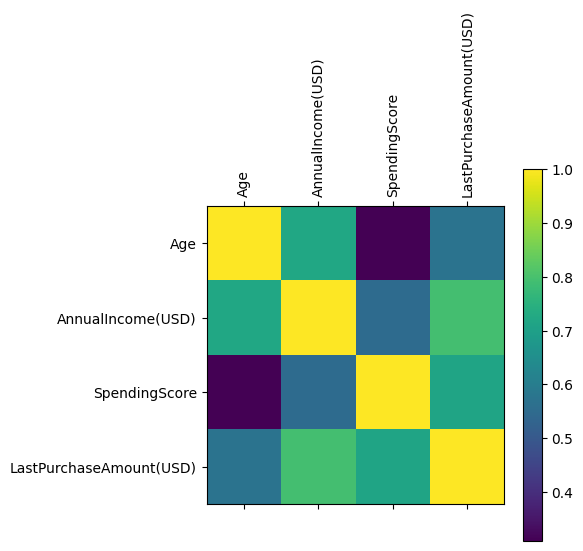

In [26]:
# Outliers Detection ( IQR methods )
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} Missing Value:\n", outliers)

## Data Standardize
scaler = StandardScaler()
plt.matshow(df[num_cols].corr())
plt.yticks(np.arange(df[num_cols].shape[1]), df[num_cols].columns)
plt.xticks(np.arange(df[num_cols].shape[1]), df[num_cols].columns, rotation=90, fontsize=10)
plt.colorbar()

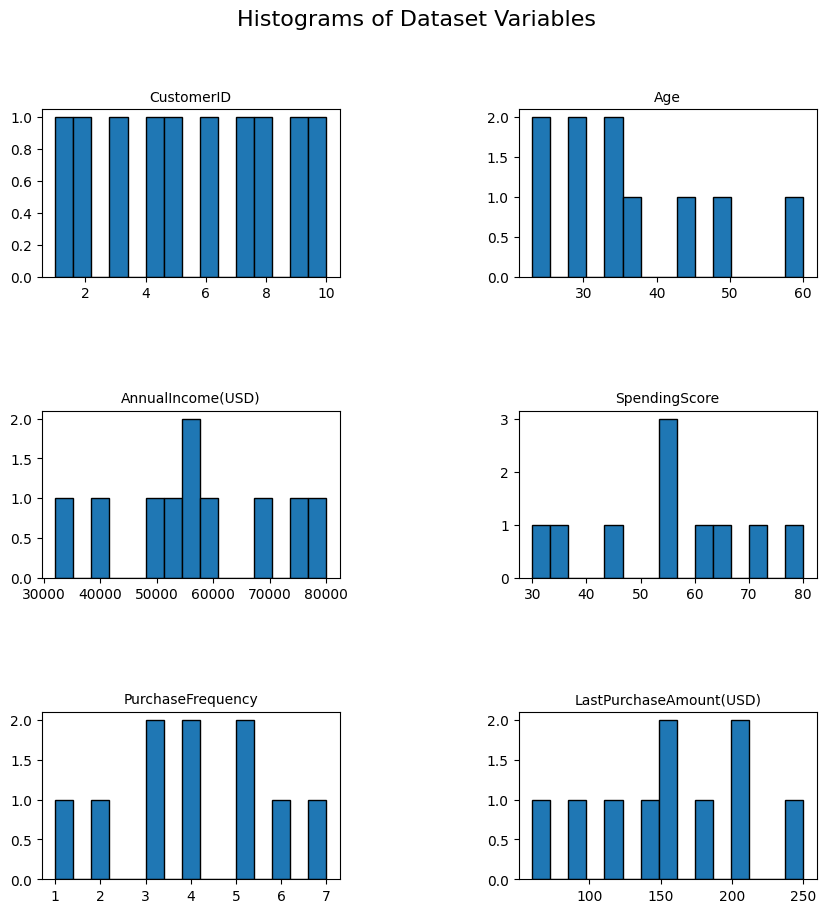

In [27]:
import textwrap
df.hist(figsize=(10, 10), bins=15, edgecolor="black", grid=False)
for ax in plt.gcf().axes:
    title = ax.get_title()
    wrapped_title = "\n".join(textwrap.wrap(title, width=30))
    ax.set_title(wrapped_title, fontsize=10)
plt.subplots_adjust(hspace=0.8, wspace=0.6)
plt.suptitle("Histograms of Dataset Variables", fontsize=16)
plt.show()

# 2. Exploratory Data Analysis (EDA) and Statistical Analysis

Data describe：
        CustomerID        Age  AnnualIncome(USD)  SpendingScore  \
count    10.00000  10.000000          10.000000      10.000000   
mean      5.50000  36.555556       57222.222222      55.000000   
std       3.02765  11.786161       14957.553111      15.275252   
min       1.00000  23.000000       32000.000000      30.000000   
25%       3.25000  28.500000       50750.000000      47.500000   
50%       5.50000  34.000000       56111.111111      55.000000   
75%       7.75000  42.888889       67500.000000      63.750000   
max      10.00000  60.000000       80000.000000      80.000000   

       PurchaseFrequency  LastPurchaseAmount(USD)  
count          10.000000                10.000000  
mean            4.000000               155.555556  
std             1.825742                57.176357  
min             1.000000                60.000000  
25%             3.000000               125.000000  
50%             4.000000               152.777778  
75%             5.000000 

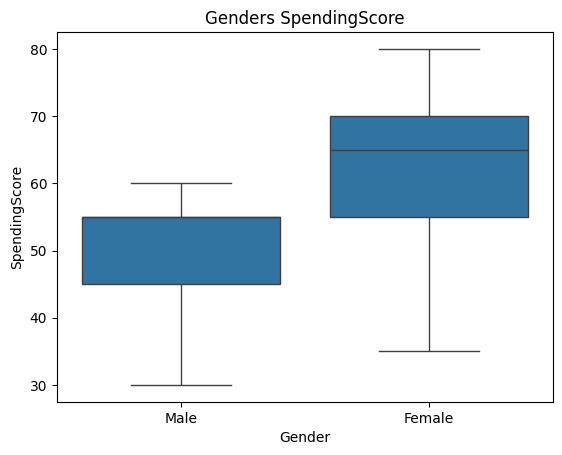

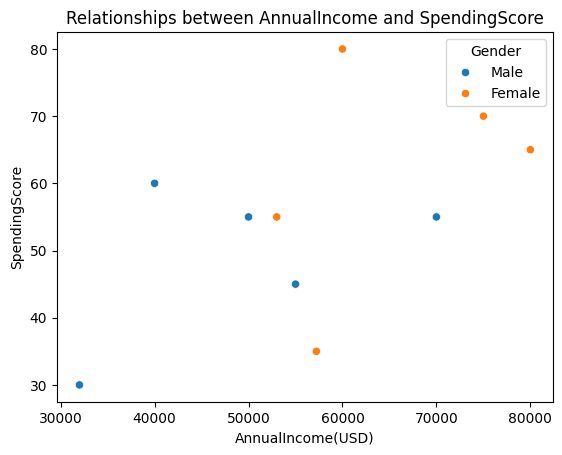

In [28]:
# Summary Statistics:
print("Data describe：\n", df.describe())

# Statistical Inference
## t-test, assess if there is a significant difference in the SpendingScore based on the Gender variable
male_scores = df[df['Gender'] == 'Male']['SpendingScore']
female_scores = df[df['Gender'] == 'Female']['SpendingScore']
t_stat, p_val = ttest_ind(male_scores, female_scores)
print(f"t统计量: {t_stat}, p值: {p_val}")

## Visualizations
# boxplot ot for the SpendingScore to show the distribution across genders
sns.boxplot(data=df, x='Gender', y='SpendingScore')
plt.title("Genders SpendingScore")
plt.show()

# scatter_plot
sns.scatterplot(data=df, x='AnnualIncome(USD)', y='SpendingScore', hue='Gender')
plt.title("Relationships between AnnualIncome and SpendingScore")
plt.show()


# 3.Machine Learning Model

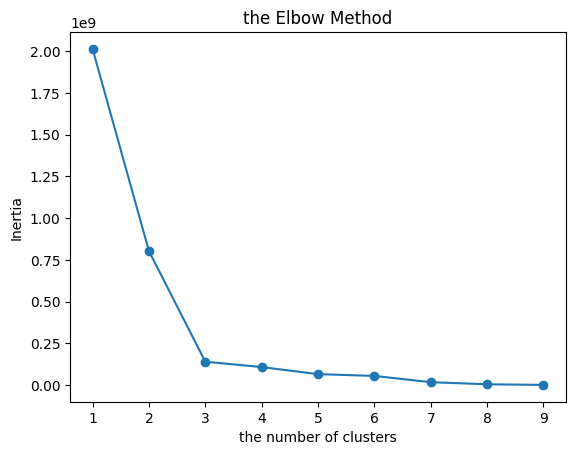

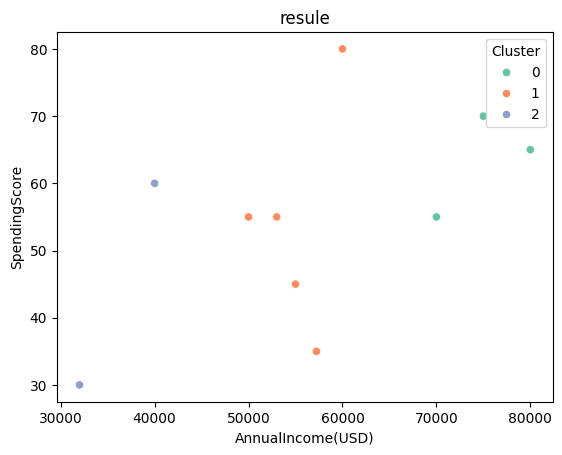

Silhouette Score: 0.6548176815087609
Cluster Centers:
 [[7.50000000e+04 6.33333333e+01]
 [5.50444444e+04 5.40000000e+01]
 [3.60000000e+04 4.50000000e+01]]
Business Recommendations Based on Clustering Results:
1. High Income & High Spending Group - Recommend premium promotional activities.
2. Medium Income & Medium Spending Group - Recommend standard promotional activities.
3. Low Income & Low Spending Group - Recommend discounts and welfare activities.


In [29]:
# K-means Clustering
features = df[['AnnualIncome(USD)', 'SpendingScore']]
k_values = range(1, 10)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Use the Elbow Method to determine the optimal number of clusters
plt.plot(k_values, inertia, marker='o')
plt.title("the Elbow Method")
plt.xlabel("the number of clusters")
plt.ylabel("Inertia")
plt.show()

# the optimal number of clusters, like "3"）
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

sns.scatterplot(data=df, x='AnnualIncome(USD)', y='SpendingScore', hue='Cluster', palette='Set2')
plt.title("resule")
plt.show()

# calculate Silhouette Score
sil_score = silhouette_score(features, df['Cluster'])
print(f"Silhouette Score: {sil_score}")

# result and suggest
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Business Recommendations Based on Clustering Results:")
print("1. High Income & High Spending Group - Recommend premium promotional activities.")
print("2. Medium Income & Medium Spending Group - Recommend standard promotional activities.")
print("3. Low Income & Low Spending Group - Recommend discounts and welfare activities.")
